<a href="https://colab.research.google.com/github/anamoliveramo/BICI-AL-TRABAJO-2026/blob/main/Taller_bici_al_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

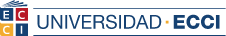
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

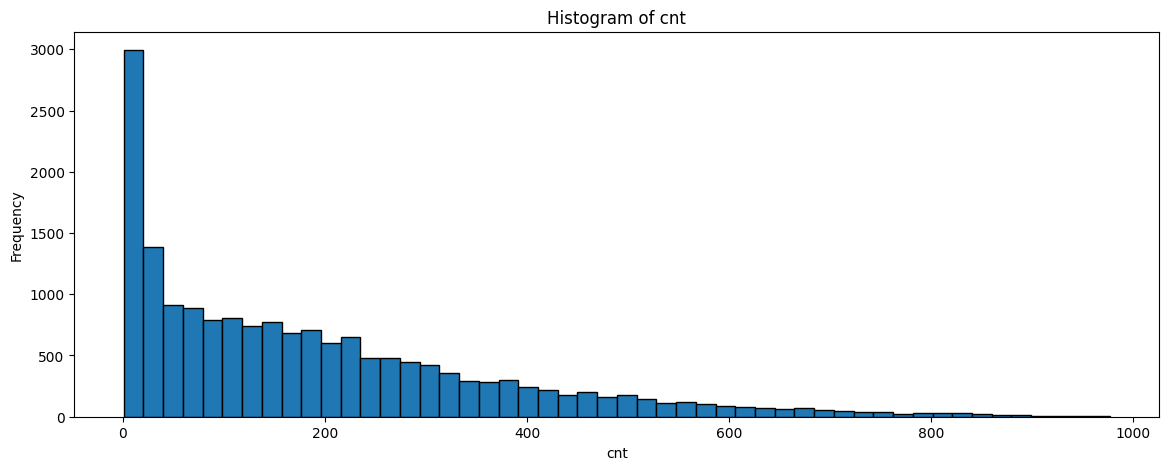

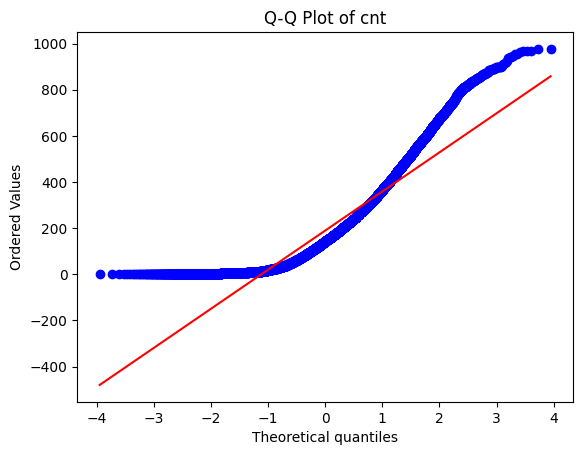

In [ ]:
# 1. Visualización
plt.figure(figsize=(14, 5))
plt.hist(df['cnt'], bins=50, edgecolor='k')
plt.title('Histogram of cnt')
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.show()

stats.probplot(df['cnt'], dist="norm", plot=plt)
plt.title('Q-Q Plot of cnt')
plt.show()

### **Interpretación pregunta 1**

**Histograma**

- El histograma muestra una clara asimetría positiva (cola derecha marcada): la mayoría de los valores se concentran cerca de cero, mientras que existen algunos valores mucho más altos que generan una cola larga hacia la derecha.

- Indica que la variable no se distribuye de manera simétrica como sería esperado en una distribución normal.

**Gráfico Q-Q (Quantile-Quantile Plot)**

- En el Q-Q plot, los puntos se desvían de manera considerable de la línea de referencia.

- En particular, en los cuantiles bajos se observa una acumulación plana (efecto del sesgo positivo), y en los cuantiles altos los valores reales son mucho mayores que los esperados bajo normalidad.

- Esto evidencia colas más pesadas y asimetría.

**Conclusión sobre Normalidad**

- A partir de ambas gráficas, se concluye que la variable cnt no puede considerarse aproximadamente normal.

- La fuerte asimetría positiva y la desviación en los cuantiles altos hacen que un modelo normal no sea adecuado.

- Como alternativa, podría explorarse una transformación logarítmica o el uso de distribuciones diferentes (p. ej. log-normal, gamma o modelos de mezcla).

**Conclusión Pregunta**

No, la distribución de cnt no puede tratarse como aproximadamente normal. Tanto el histograma como el Q-Q plot muestran una fuerte asimetría hacia la derecha y desviaciones marcadas respecto a la normalidad.


## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']

pearson_corr = df[columnas_relacion].corr(method='pearson')
spearman_corr = df[columnas_relacion].corr(method='spearman')

print("Pearson Correlation:")
display(pearson_corr)

print("\nSpearman Correlation:")
display(spearman_corr)

Pearson Correlation:


,cnt,temp,hum,windspeed
cnt,1.000000,0.404772,-0.322911,0.093234
temp,0.404772,1.000000,-0.069881,-0.023125
hum,-0.322911,-0.069881,1.000000,-0.290105
windspeed,0.093234,-0.023125,-0.290105,1.000000



Spearman Correlation:


,cnt,temp,hum,windspeed
cnt,1.000000,0.423330,-0.359614,0.126629
temp,0.423330,1.000000,-0.055408,-0.009719
hum,-0.359614,-0.055408,1.000000,-0.293913
windspeed,0.126629,-0.009719,-0.293913,1.000000


### **Interpretación pregunta 2**

**Cnt vs Temp**

- Pearson = 0.405, Spearman = 0.423

- Existe una correlación positiva moderada: cuando la temperatura sube, también aumenta la variable cnt.

- La relación es más monótona creciente que estrictamente lineal (Spearman > Pearson).

- En otras palabras, a mayor temperatura, la cantidad (cnt) tiende a crecer de forma consistente, aunque no necesariamente siguiendo una recta perfecta.

**Cnt vs Hum**

- Pearson = -0.323, Spearman = -0.360

- Existe una correlación negativa moderada: a mayor humedad, cnt tiende a disminuir.

- La relación es más monótona decreciente que lineal (Spearman < Pearson pero en magnitudes similares).

- La caída en cnt cuando la humedad aumenta es clara, aunque no es perfectamente proporcional.

**Cnt vs Windspeed**

- Pearson = 0.093, Spearman = 0.127

- La relación es muy débil y positiva: un ligero aumento en el viento está asociado con un pequeño incremento en cnt.

- La relación es muy débil y, aunque muestra una tendencia monótona leve, carece de fuerza para considerarse relevante.

- Se puede decir que hay un patrón creciente, pero demasiado débil para tener relevancia práctica.

**Conclusion**
- La variable cnt co-varía principalmente con temp y hum, siendo la temperatura la que presenta la correlación positiva más clara y la humedad la correlación negativa más marcada.

- La comparación Pearson vs Spearman muestra que: Con temperatura y humedad, la relación es monótona pero no estrictamente lineal. Con velocidad del viento, la relación es casi inexistente (muy débil).

- Esto sugiere que los cambios en cnt siguen tendencias generales crecientes o decrecientes según la variable, pero no con una proporcionalidad perfecta.


## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**

El Teorema del Límite Central (TLC) establece que, independientemente de la forma de la distribución original de una variable, la distribución de la media muestral tiende a aproximarse a una distribución normal conforme aumenta el tamaño de la muestra. Esto permite justificar el uso de intervalos de confianza y pruebas estadísticas basadas en la normalidad para la media, incluso cuando la variable original es sesgada, como en el caso de una distribución log-normal. En la práctica, esta aproximación comienza a ser aceptable a partir de tamaños muestrales entre 30 y 50, ya que para muestras pequeñas la distribución de las medias puede mantener la asimetría y variabilidad de la población. En distribuciones altamente sesgadas, se recomienda tomar muestras de al menos 50 observaciones para que la distribución de la media muestral sea suficientemente cercana a una normal, asegurando así la validez de los métodos estadísticos que asumen normalidad.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# Make sure to run cell 8bqLjDejovLi to define the 'df' DataFrame before running this cell.
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

# Realizar el test de hipotesis de una muestra
statistic, p_value = stats.ttest_1samp(cnt_laborales, valor_hipotesis)

print(f"test statistic: {statistic}")
print(f"p-value: {p_value}")

#regla de decision
alpha= 0.05
if p_value < alpha:
  print("rechazar la hipotesis nula, porque se tiene evidencia estadistica, la media de la demanda es significarivamente diferente de 4500")
if p_value >= alpha:
  print("No se puede rechazar la hipotesis nula. No hay suficiente evidencia para concluir que la media de cnt sea siguiente")




test statistic: -2534.333902273014
p-value: 0.0
rechazar la hipotesis nula, porque se tiene evidencia estadistica, la media de la demanda es significarivamente diferente de 4500


### **Interpretación pregunta 4**

**Planteamiento**
Se desea contrastar si la media de la demanda en días laborales es mayor o igual a 4.500. Para ello se realiza un test t de una muestra, con:

- Hipótesis nula (H₀): μ = 4500

- Hipótesis alternativa (H₁): μ ≠ 4500

- Nivel de significancia: α = 0.05.

**Resultados estadísticos**

- Estadístico t: -2534.33

- p-valor: 0.0

**Análisis**

- El p-valor es prácticamente cero, mucho menor que 0.05, lo cual indica una evidencia estadística contundente contra la hipótesis nula.

- El valor tan negativo del estadístico t revela que la media observada es muy inferior a 4.500.

Por tanto, se concluye que la media de la demanda en días laborales no es igual a 4.500, sino que resulta significativamente menor.

**Conclusión práctica**

La evidencia estadística confirma que en días laborales la demanda promedio (cnt) es menor a 4.500. Esto significa que el valor de 4.500 no puede considerarse una referencia adecuada para la media, ya que la verdadera media está claramente por debajo de este umbral.

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [ ]:
# Make sure to run cell 8bqLjDejovLi to define the 'df' DataFrame before running this cell.
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

# Remuestreo
for _ in range(n_iterations):
    bootstrap_sample = df['cnt'].sample(n=sample_size, replace=True)
    bootstrap_median = bootstrap_sample.median()
    medians.append(bootstrap_median)

### **Interpretación pregunta 5**

El código implementa un método bootstrap para estimar un intervalo de confianza (IC) para la mediana de la columna cnt del DataFrame df.

**Qué hace el código:**

-	Genera 5000 remuestreos con reemplazo a partir de df['cnt'].
-	Calcula la mediana de cada remuestreo.
-	Guarda todas las medianas en la lista medians. Después, se puede calcular el IC bootstrap.

El código implementa un método bootstrap para estimar un intervalo de confianza (IC) del 95% para la mediana de la variable cnt. Para ello, realiza 5000 remuestreos aleatorios con reemplazo del conjunto de datos, calcula la mediana en cada muestra y guarda estos valores en la lista medians. A partir de estas medianas se obtiene el IC, que representa el rango dentro del cual, con un 95% de confianza, se encuentra la mediana real de cnt. Si la distribución de cnt es simétrica, el IC será equilibrado alrededor de la mediana; en cambio, si la distribución es sesgada, el intervalo será asimétrico, y el uso de bootstrap es especialmente adecuado, ya que no asume normalidad y proporciona una estimación más precisa y confiable.

